# Clustering (East West Airlines)

Shubham's Assignment

In [1]:
#import libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#load data
xls = pd.ExcelFile('EastWestAirlines.xlsx')
air = pd.read_excel(xls,'data')

In [4]:
air

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [5]:
air.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [6]:
air.shape

(3999, 12)

In [7]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [8]:
# Dataset column renaming

In [9]:
air.columns = ['ID', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles','Bonus_miles', 'Bonus_trans', 
                 'Flight_miles_12mo', 'Flight_trans_12','Days_since_enroll', 'Award']

In [10]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award              3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [11]:
air.head(10)

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
5,6,16420,0,1,1,1,0,0,0,0,6942,0
6,7,84914,0,3,1,1,27482,25,0,0,6994,0
7,8,20856,0,1,1,1,5250,4,250,1,6938,1
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1


In [12]:

# write a loop to check datatype other than integer, if found any that will be replaced by Nan

In [13]:
def column_preprocessor(df):
    count = 0
    for row in df:
        try:
            if type(row) != int:
                df.loc[count] = np.nan
        except:
            pass
        count +=1

In [14]:
column_preprocessor(air[air.columns])

In [15]:
air.isna().any().sum()

0

In [16]:
#EDA

In [17]:
air.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,3999.0,2014.819455,1160.764358,1.0,1010.5,2016.0,3020.5,4021.0
Balance,3999.0,73601.327582,100775.664958,0.0,18527.5,43097.0,92404.0,1704838.0
Qual_miles,3999.0,144.114529,773.663804,0.0,0.0,0.0,0.0,11148.0
cc1_miles,3999.0,2.059515,1.376919,1.0,1.0,1.0,3.0,5.0
cc2_miles,3999.0,1.014504,0.147650,1.0,1.0,1.0,1.0,3.0
cc3_miles,3999.0,1.012253,0.195241,1.0,1.0,1.0,1.0,5.0
Bonus_miles,3999.0,17144.846212,24150.967826,0.0,1250.0,7171.0,23800.5,263685.0
Bonus_trans,3999.0,11.601900,9.603810,0.0,3.0,12.0,17.0,86.0
Flight_miles_12mo,3999.0,460.055764,1400.209171,0.0,0.0,0.0,311.0,30817.0
Flight_trans_12,3999.0,1.373593,3.793172,0.0,0.0,0.0,1.0,53.0


In [18]:
air.head(2)

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0


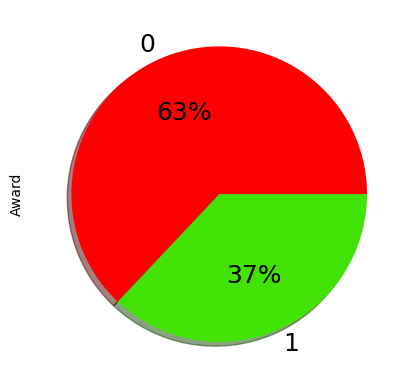

In [19]:
air['Award'].value_counts().plot(kind='pie', autopct='%2.0f%%', fontsize='18', 
                                        colors = ['#FF0000','#43E206'], shadow =True)
plt.show()

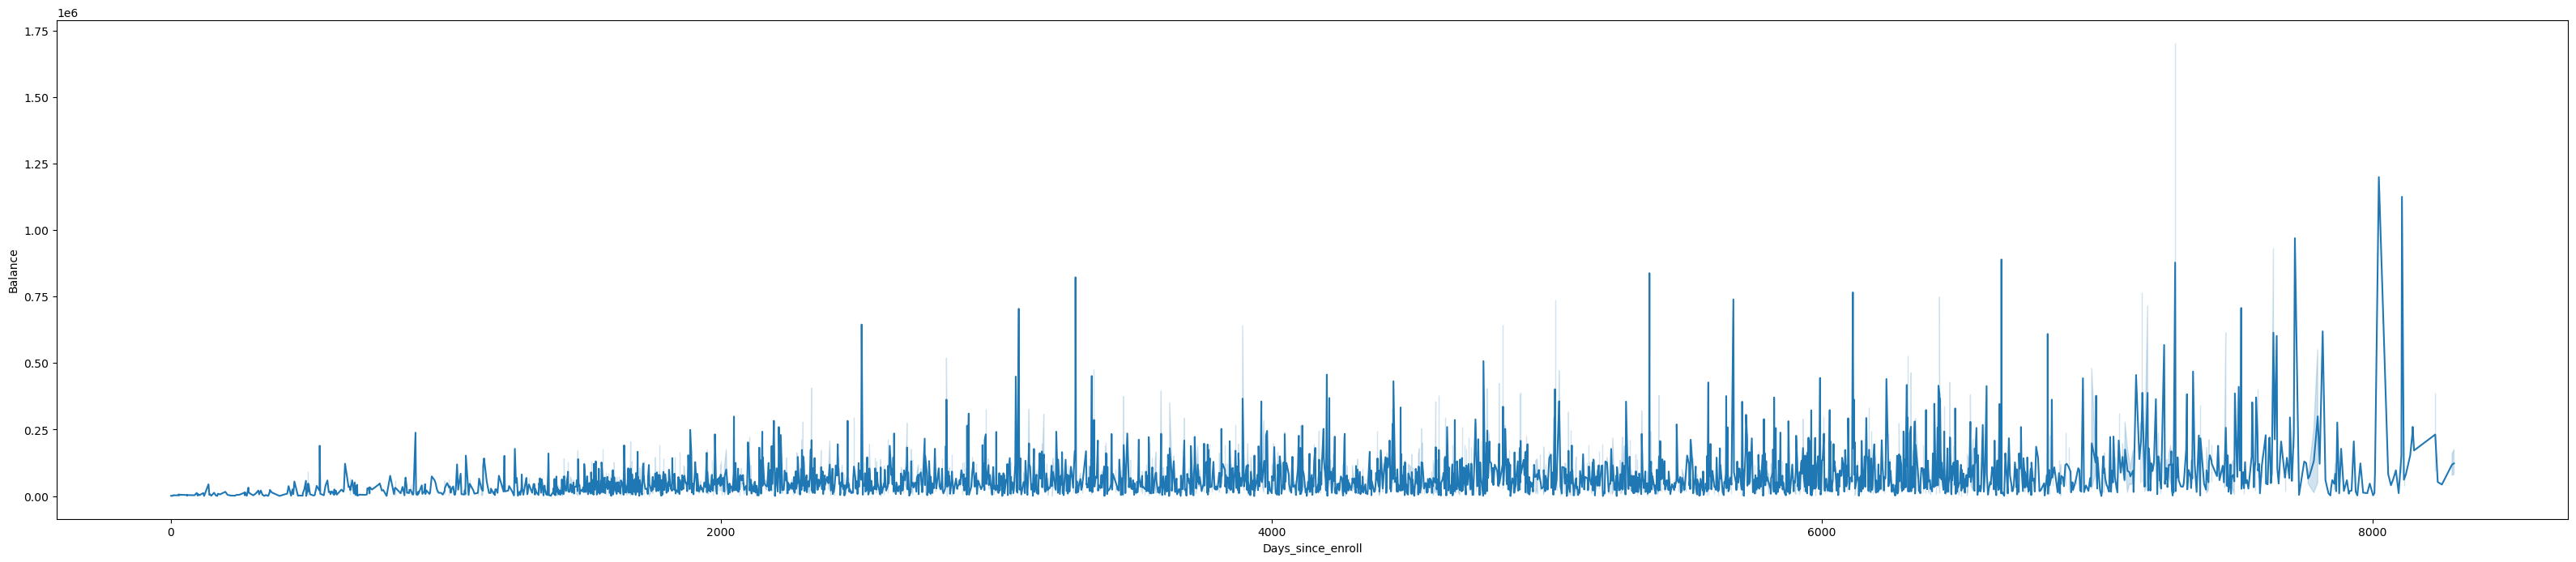

In [20]:
fig, ax =plt.subplots(figsize=(40,8))
ax = sns.lineplot(x= 'Days_since_enroll', y='Balance',data = air)

<AxesSubplot:>

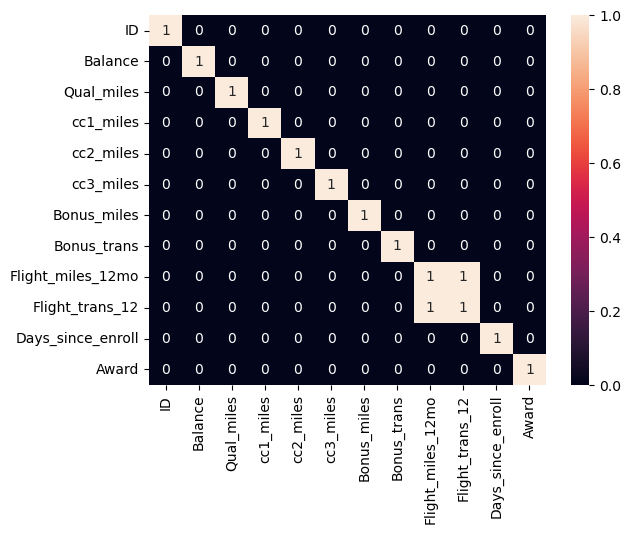

In [21]:
sns.heatmap(air.corr()>0.85, annot=True)

In [22]:
#data preprocessing
air1 =  air.drop(['ID','Award'], axis=1)
air1.head(2)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968


In [23]:
# Standardization

In [24]:
from sklearn.preprocessing import StandardScaler
std_df = StandardScaler().fit_transform(air1)
std_df.shape

(3999, 10)

In [25]:
# MinMaxScaler

In [26]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
minmax_df = minmax.fit_transform(air1)
minmax_df.shape

(3999, 10)

In [27]:
# PCA

In [28]:
from sklearn.decomposition import PCA
pca_std = PCA(random_state=10, n_components=0.95)
pca_std_df= pca_std.fit_transform(std_df)

In [29]:
print(pca_std.singular_values_)

[110.44189995  83.11377294  64.82616793  63.48944763  61.96605949
  60.17942085  51.82140955  38.09870033]


In [30]:
print(pca_std.explained_variance_ratio_*100)

[30.50115845 17.27406665 10.5087073  10.07979485  9.60188179  9.05617078
  6.71532505  3.62968484]


In [31]:
cum_variance = np.cumsum(pca_std.explained_variance_ratio_*100)
cum_variance

array([30.50115845, 47.7752251 , 58.28393239, 68.36372724, 77.96560903,
       87.02177981, 93.73710486, 97.3667897 ])

In [32]:
from sklearn.decomposition import PCA
pca_minmax =  PCA(random_state=10, n_components=0.95)
pca_minmax_df = pca_minmax.fit_transform(minmax_df)

In [33]:
print(pca_minmax.singular_values_)

[23.30644253 14.98078096  6.73641543  4.71018421  4.35528647]


In [34]:
print(pca_minmax.explained_variance_ratio_*100)

[60.47067269 24.98398618  5.05185116  2.46983879  2.11167109]


In [35]:
#import the KElbowVisualizer Method

In [36]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer

In [37]:
model1 = KMeans(random_state=0)

In [38]:
model2 = KMeans(random_state=10, max_iter=500, n_init=20)

In [39]:
visualizer1 = KElbowVisualizer(model1, k=(2,10), metric='silhouette', timings=False)

In [40]:
visualizer2 = KElbowVisualizer(model2, k=(2,10), metric='silhouette', timings=False)

model1


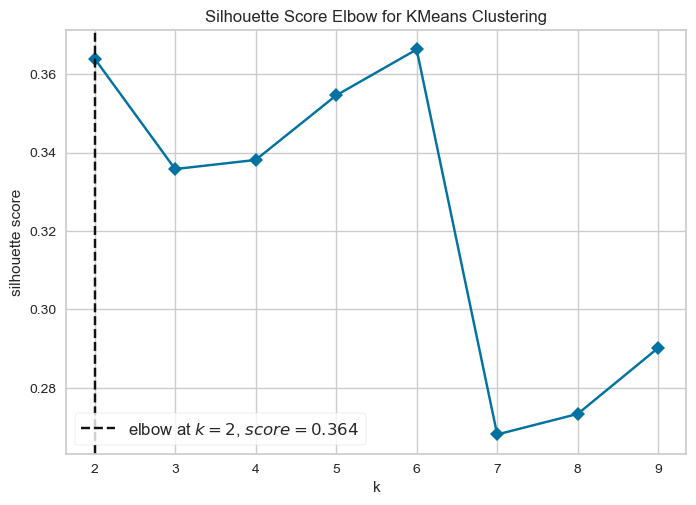

In [41]:
print('model1')
visualizer1.fit(pca_std_df)    
visualizer1.poof()
plt.show()

model2


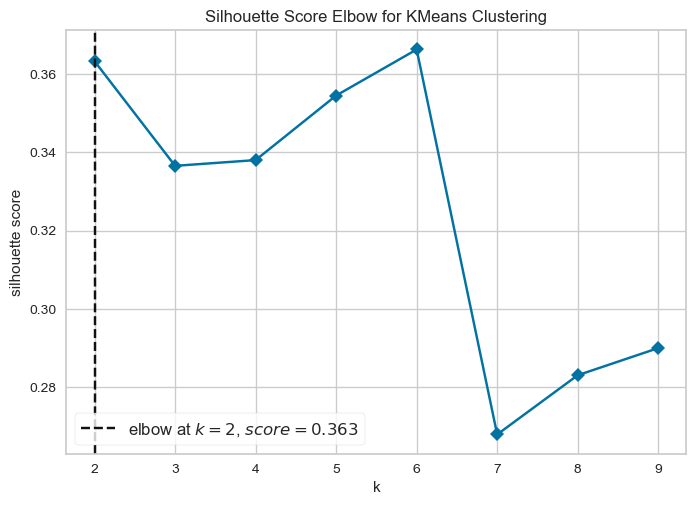

In [42]:
print('model2')
visualizer2.fit(pca_std_df)    
visualizer2.poof()
plt.show()

In [44]:
from sklearn.metrics import silhouette_score
list1= [2,3,4,5,6,7,8,9]  # start number from 2.
for n_clusters in list1:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(pca_std_df)
    sil_score1= silhouette_score(pca_std_df, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.36397881678961747
For n_clusters = 3 The average silhouette_score is : 0.335800689368627
For n_clusters = 4 The average silhouette_score is : 0.3381189559647632
For n_clusters = 5 The average silhouette_score is : 0.354575129869185
For n_clusters = 6 The average silhouette_score is : 0.36628692523309964
For n_clusters = 7 The average silhouette_score is : 0.26812534351796585
For n_clusters = 8 The average silhouette_score is : 0.27336588002771184
For n_clusters = 9 The average silhouette_score is : 0.29020780384748357


In [46]:
model3 = KMeans(random_state=0)

In [47]:
model4 = KMeans(random_state=10, max_iter=500, n_init=20)

In [48]:
visualizer3 = KElbowVisualizer(model3, k=(2,10), metric='silhouette', timings=False)

In [49]:
visualizer4 = KElbowVisualizer(model4, k=(2,10), metric='silhouette', timings=False)

model3


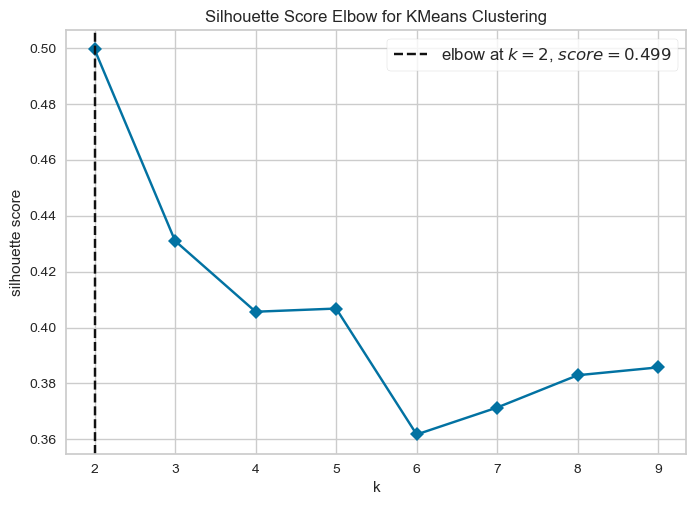

In [50]:
print('model3')
visualizer3.fit(pca_minmax_df)    
visualizer3.poof()
plt.show()

model4


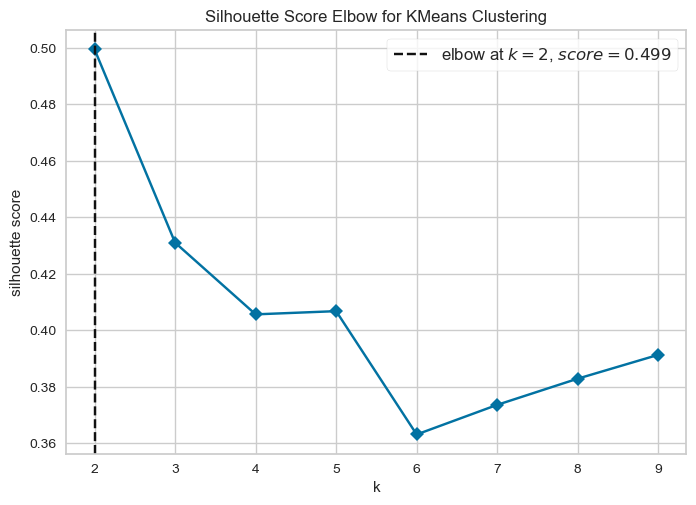

In [51]:
print('model4')
visualizer4.fit(pca_minmax_df)    
visualizer4.poof()
plt.show()

In [52]:
from sklearn.metrics import silhouette_score

list1= [2,3,4,5,6,7,8,9]  # always start number from 2.

for n_clusters in list1:
    clusterer2 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels2 = clusterer1.fit_predict(pca_minmax_df)
    sil_score2= silhouette_score(pca_std_df, cluster_labels2)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score2)

For n_clusters = 2 The average silhouette_score is : 0.1589810244178823
For n_clusters = 3 The average silhouette_score is : 0.1589810244178823
For n_clusters = 4 The average silhouette_score is : 0.1589810244178823
For n_clusters = 5 The average silhouette_score is : 0.1589810244178823
For n_clusters = 6 The average silhouette_score is : 0.1589810244178823
For n_clusters = 7 The average silhouette_score is : 0.1589810244178823
For n_clusters = 8 The average silhouette_score is : 0.1589810244178823
For n_clusters = 9 The average silhouette_score is : 0.1589810244178823


In [53]:
# K-Means Clustering Algorithm

In [55]:
model1 = KMeans(n_clusters=6, random_state=0)
y_predict1 = model1.fit_predict(pca_std_df)
y_predict1.shape

(3999,)

In [56]:
y_predict1

array([1, 1, 1, ..., 1, 1, 1])

In [57]:
model1.labels_

array([1, 1, 1, ..., 1, 1, 1])

In [58]:
model1.cluster_centers_

array([[ 1.00930830e+00,  1.64553073e+00, -3.00204858e+00,
        -1.50525621e+00,  4.87613963e+00, -2.83327858e+00,
        -8.15524057e-01, -2.42368955e-02],
       [-1.04312258e+00,  2.60937871e-01, -1.57354688e-02,
        -8.62930270e-02, -5.29463412e-02,  1.40872802e-01,
         5.55074837e-02,  9.04844177e-04],
       [ 4.35245436e+00, -3.63296061e+00,  8.67825558e+00,
        -7.27101378e+00,  7.22379804e+00,  6.82996771e+00,
         1.09780252e-01, -3.57742407e-01],
       [ 1.39804051e+00, -1.00275351e+00, -7.94776789e-02,
         9.64914049e-02, -2.55443434e-01, -2.46040607e-01,
        -6.93666285e-02, -2.00121569e-02],
       [ 4.25165028e+00,  4.10908160e+00,  1.48662899e-01,
        -2.15415252e-01, -6.18448771e-01,  4.99526780e-01,
        -5.24799096e-02,  1.44221559e-01],
       [ 4.76675141e-02,  1.06794180e+00,  3.90187367e+00,
         7.28531492e+00,  3.55053601e+00, -6.82561937e-01,
         2.01781543e-01,  2.39276034e-01]])

In [59]:
model1.inertia_

16718.170043374128

In [60]:
model1.score(pca_std_df) 

-16718.170043374128

In [61]:
model1.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 6,
 'n_init': 'warn',
 'random_state': 0,
 'tol': 0.0001,
 'verbose': 0}

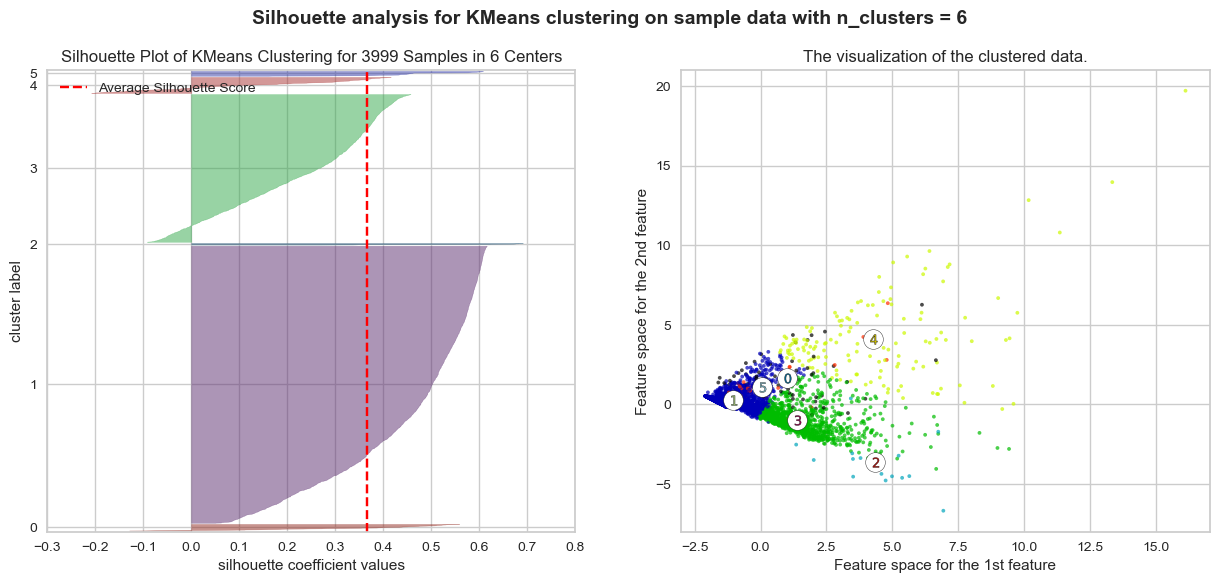

In [62]:
from yellowbrick.cluster import SilhouetteVisualizer
fig,(ax1,ax2) = plt.subplots(1,2,sharey=False)
fig.set_size_inches(15,6)
sil_visualizer1 = SilhouetteVisualizer(model1,ax= ax1, colors=['#922B21','#5B2C6F','#1B4F72','#32a84a','#a83232','#323aa8'])
sil_visualizer1.fit(pca_std_df)
import matplotlib.cm as cm
colors1 = cm.nipy_spectral(model1.labels_.astype(float) / 6) # 6 is number of clusters
ax2.scatter(pca_std_df[:, 0], pca_std_df[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors1, edgecolor='k')
centers1 = model1.cluster_centers_
ax2.scatter(centers1[:, 0], centers1[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')
for i, c in enumerate(centers1):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')
ax2.set_title(label ="The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")
plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % 6),fontsize=14, fontweight='bold')
sil_visualizer1.show()
plt.show()

In [63]:
centers1 = model1.cluster_centers_
centers1

array([[ 1.00930830e+00,  1.64553073e+00, -3.00204858e+00,
        -1.50525621e+00,  4.87613963e+00, -2.83327858e+00,
        -8.15524057e-01, -2.42368955e-02],
       [-1.04312258e+00,  2.60937871e-01, -1.57354688e-02,
        -8.62930270e-02, -5.29463412e-02,  1.40872802e-01,
         5.55074837e-02,  9.04844177e-04],
       [ 4.35245436e+00, -3.63296061e+00,  8.67825558e+00,
        -7.27101378e+00,  7.22379804e+00,  6.82996771e+00,
         1.09780252e-01, -3.57742407e-01],
       [ 1.39804051e+00, -1.00275351e+00, -7.94776789e-02,
         9.64914049e-02, -2.55443434e-01, -2.46040607e-01,
        -6.93666285e-02, -2.00121569e-02],
       [ 4.25165028e+00,  4.10908160e+00,  1.48662899e-01,
        -2.15415252e-01, -6.18448771e-01,  4.99526780e-01,
        -5.24799096e-02,  1.44221559e-01],
       [ 4.76675141e-02,  1.06794180e+00,  3.90187367e+00,
         7.28531492e+00,  3.55053601e+00, -6.82561937e-01,
         2.01781543e-01,  2.39276034e-01]])

In [64]:

# Put the Cluster lables into original dataset And then analysis


In [65]:
model1_cluster = pd.DataFrame(model1.labels_.copy(), columns=['Kmeans_Clustering'])
model1_cluster

,Kmeans_Clustering
0,1
1,1
2,1
3,1
4,3
...,...
3994,1
3995,1
3996,1
3997,1


In [66]:
Kmeans_df = pd.concat([air.copy(), model1_cluster], axis=1)
Kmeans_df.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Kmeans_Clustering
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,3


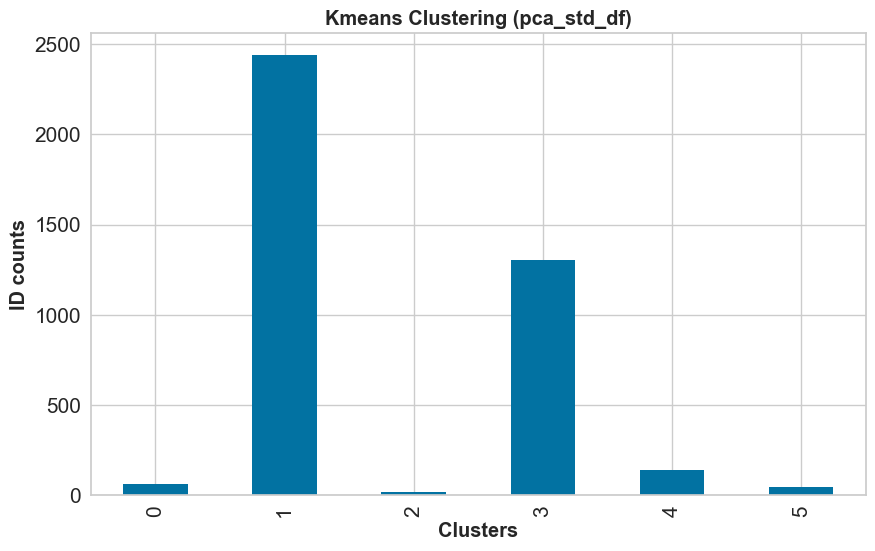

In [67]:
fig, ax = plt.subplots(figsize=(10, 6))
Kmeans_df.groupby(['Kmeans_Clustering']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Kmeans Clustering (pca_std_df)',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [68]:
# Hierarchical Clustering Algorithm

In [69]:
# 1. By using Dendrogram

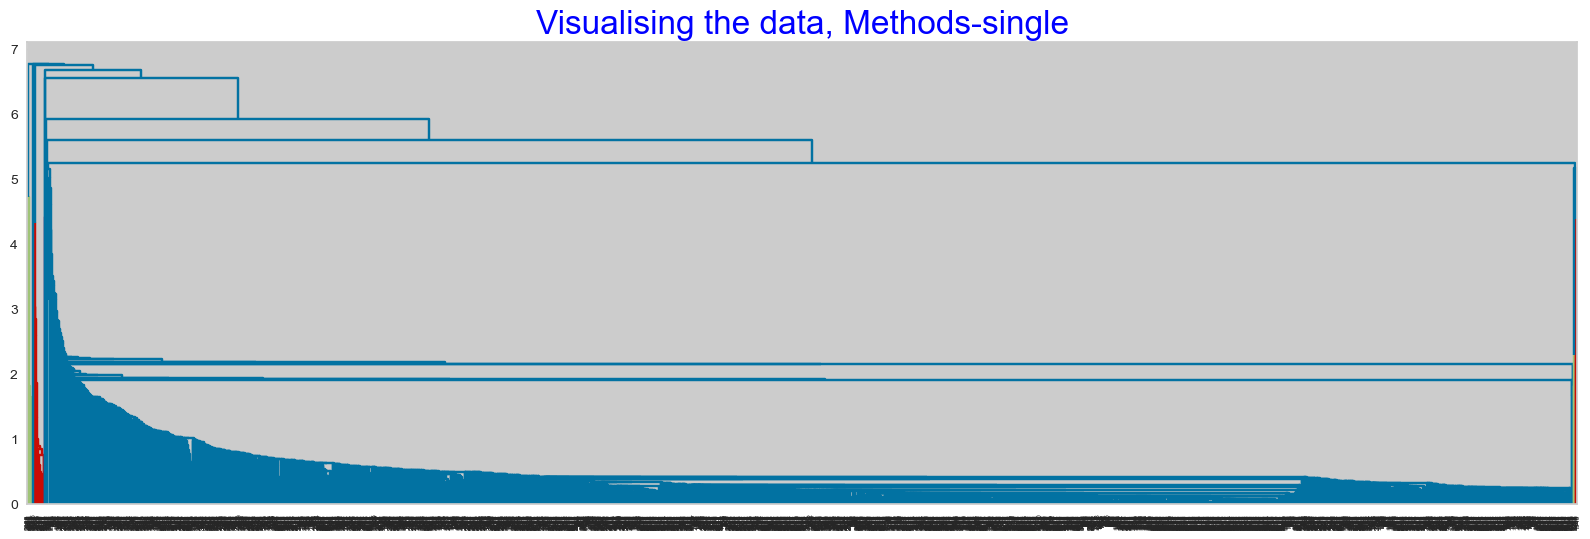

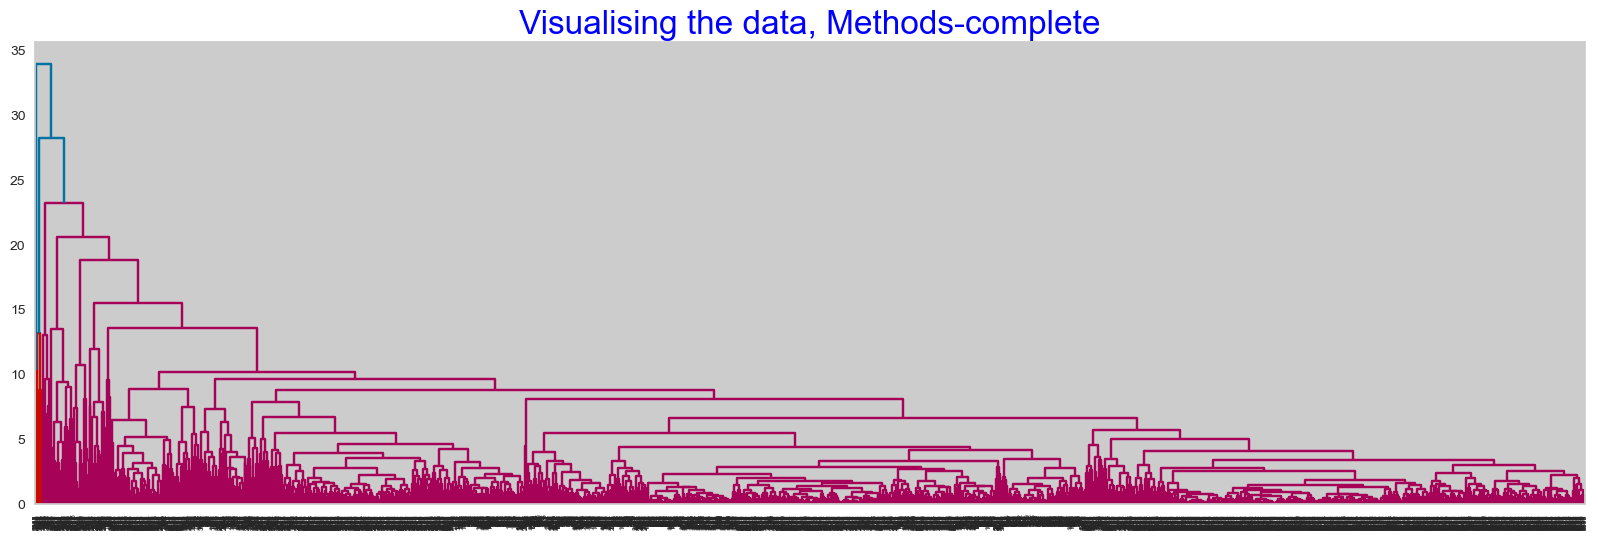

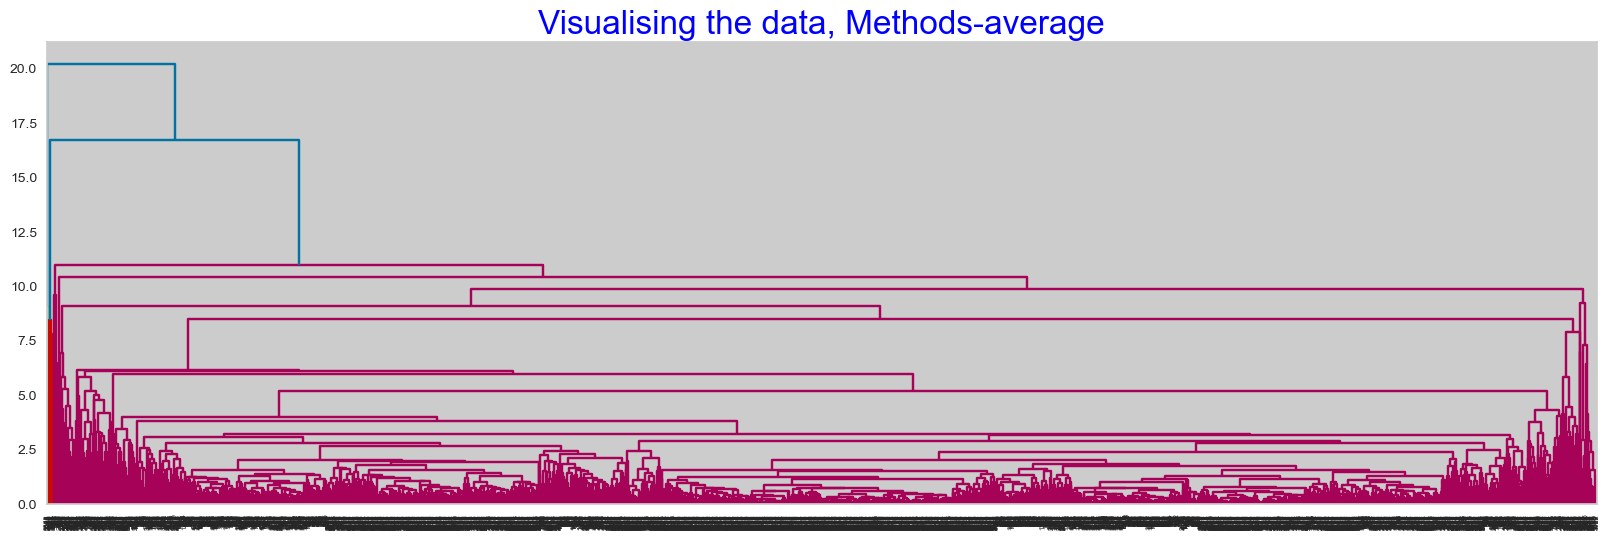

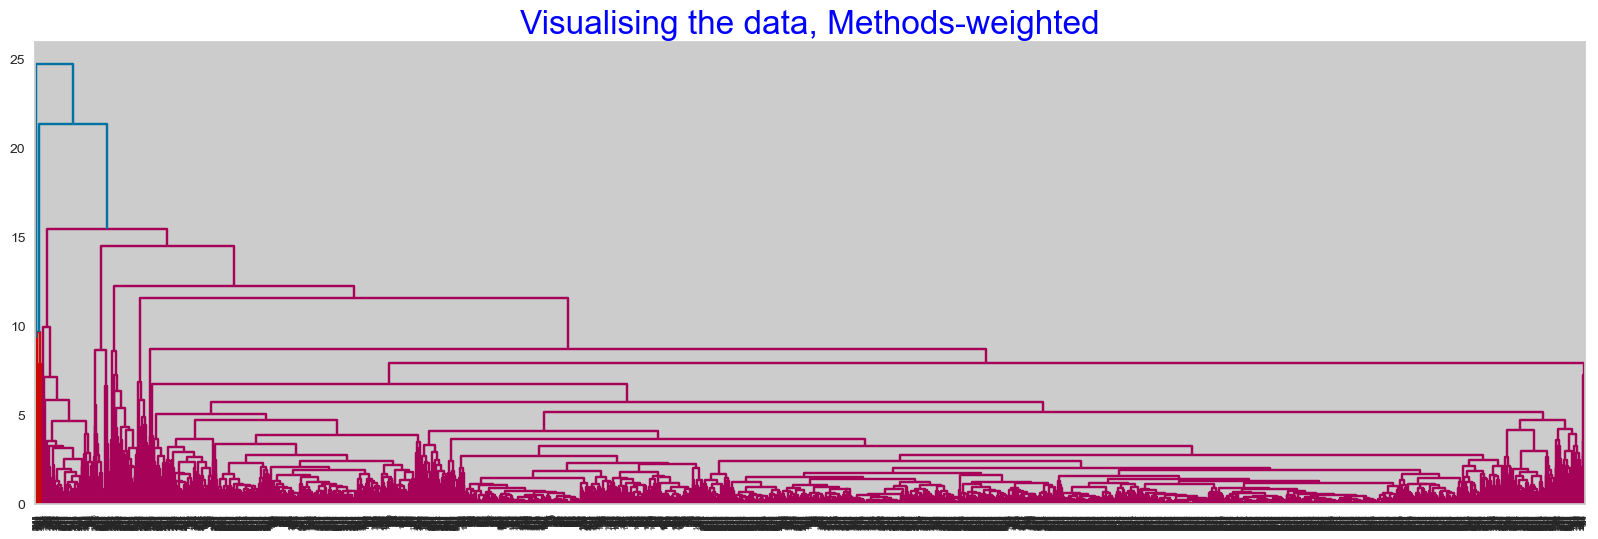

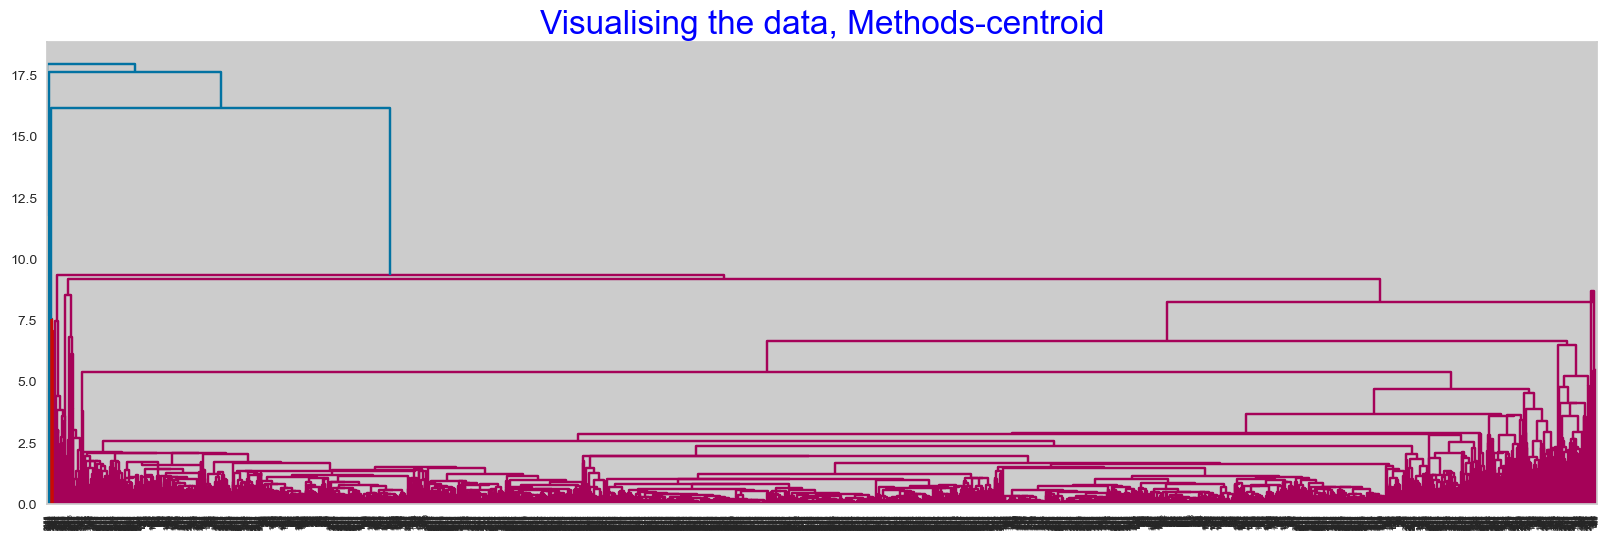

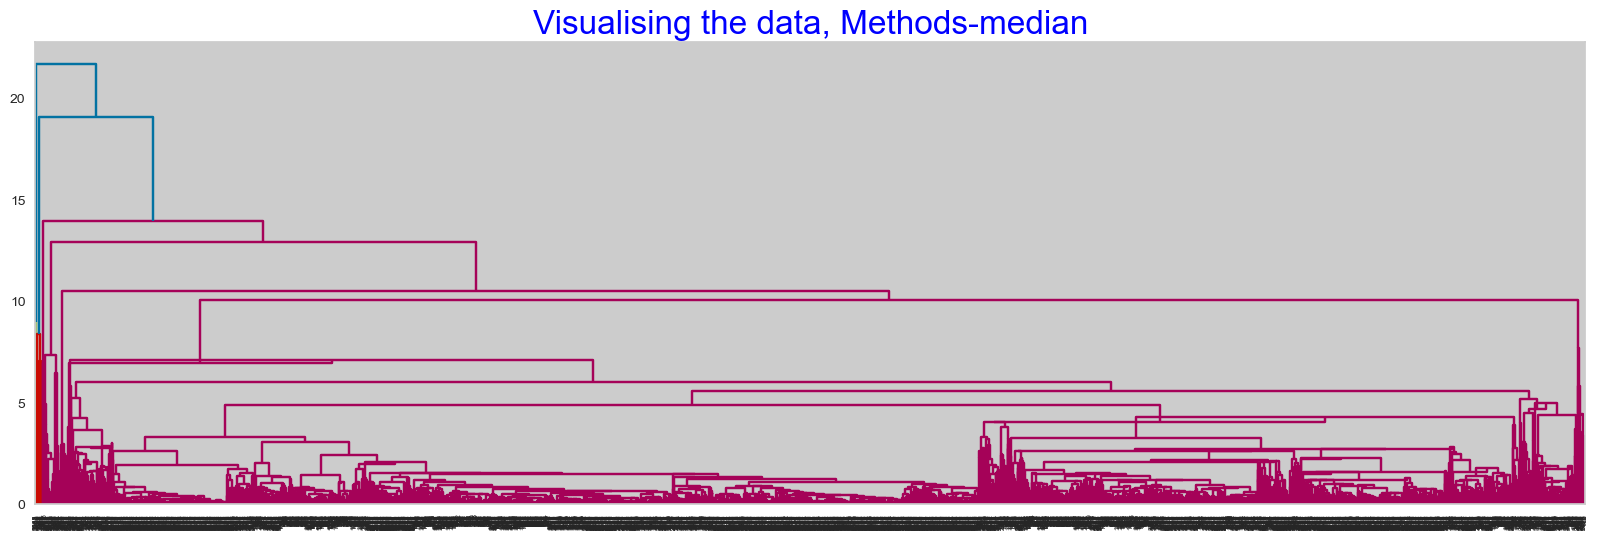

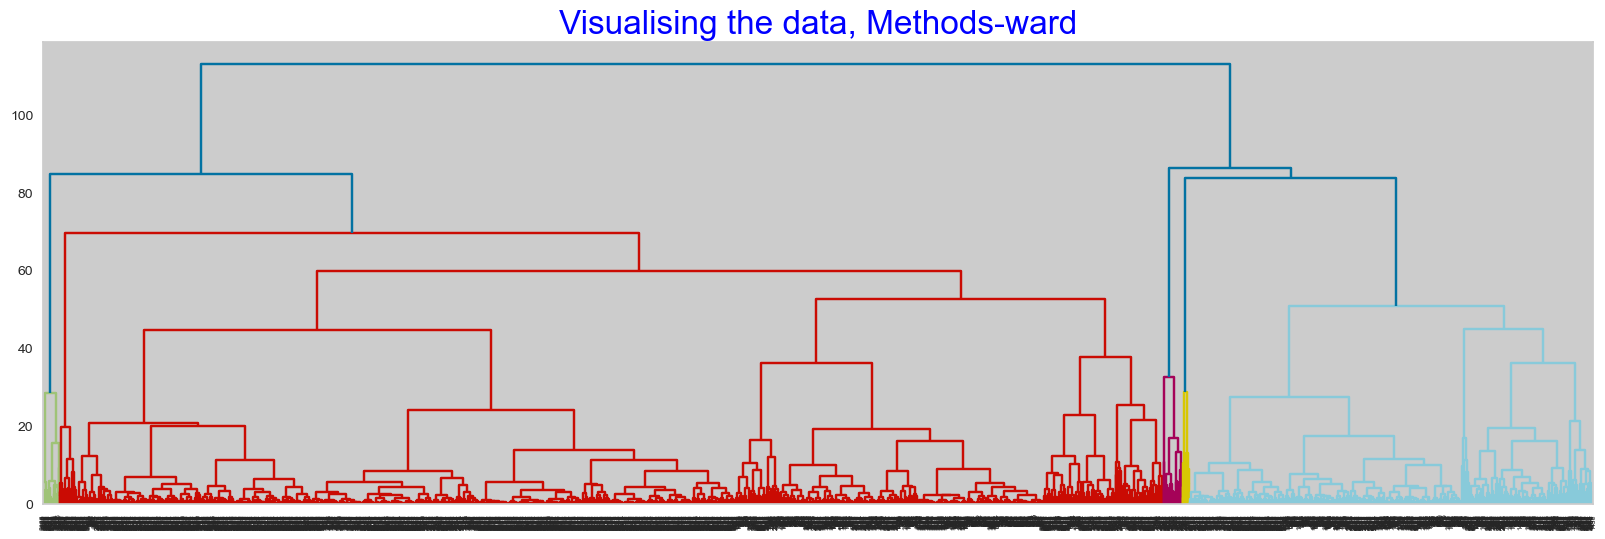

In [70]:
import scipy.cluster.hierarchy as shc
for methods in ['single','complete','average','weighted','centroid','median','ward']:
    plt.figure(figsize =(20, 6))
    dict={'fontsize':24,'fontweight':16,'color':'blue'}
    plt.title('Visualising the data, Methods-{}'.format(methods),fontdict = dict) 
    Dendrogram1 = shc.dendrogram(shc.linkage(pca_std_df, method = methods,optimal_ordering=False)) 

In [71]:
# By using Silhouette Score method

In [72]:
from sklearn.cluster import AgglomerativeClustering
n_clusters = [2,3,4,5,6,7,8]  
for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(pca_std_df)
        silhouette_score1 = silhouette_score(pca_std_df, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.3139605594950567
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.8258402005485836
For n_clusters = 2 The average silhouette_score with linkage- average : 0.8258402005485836
For n_clusters = 2 The average silhouette_score with linkage- single : 0.7595573832017465

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.3099513555846737
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.7965798717740988
For n_clusters = 3 The average silhouette_score with linkage- average : 0.7965798717740988
For n_clusters = 3 The average silhouette_score with linkage- single : 0.7592925058168964

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.3282481973781311
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.6569044547102614
For n_clusters = 4 The average silhouette_score with linkage- average : 0.6940154925011895
For n

In [73]:
from sklearn.cluster import AgglomerativeClustering
n_clusters = [2,3,4,5,6,7,8]  
for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster2 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels2 = hie_cluster2.fit_predict(pca_minmax_df)
        silhouette_score2 = silhouette_score(pca_minmax_df, hie_labels2)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score2)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.45263516644787416
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.5857808960475942
For n_clusters = 2 The average silhouette_score with linkage- average : 0.5003973034034865
For n_clusters = 2 The average silhouette_score with linkage- single : 0.6061073734453646

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.3739125364654644
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.45428336551160237
For n_clusters = 3 The average silhouette_score with linkage- average : 0.450642610187889
For n_clusters = 3 The average silhouette_score with linkage- single : 0.5029366855064079

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.36547786997315534
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.4561547100712364
For n_clusters = 4 The average silhouette_score with linkage- average : 0.3946568858456755
For

In [74]:
agg_clustering = AgglomerativeClustering(n_clusters=5, linkage='average')
y_pred_hie = agg_clustering.fit_predict(pca_std_df)
print(y_pred_hie.shape)

(3999,)


In [75]:
y_pred_hie

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [76]:
agg_clustering.n_clusters_

5

In [77]:
agg_clustering.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [78]:
agg_clustering.n_leaves_

3999

In [79]:
agg_clustering.n_connected_components_

1

In [80]:
agg_clustering.children_

array([[3370, 3876],
       [1826, 2121],
       [2678, 2679],
       ...,
       [7991, 7993],
       [7986, 7994],
       [7988, 7995]])

In [81]:
(silhouette_score(pca_std_df, agg_clustering.labels_)*100).round(3)

66.804

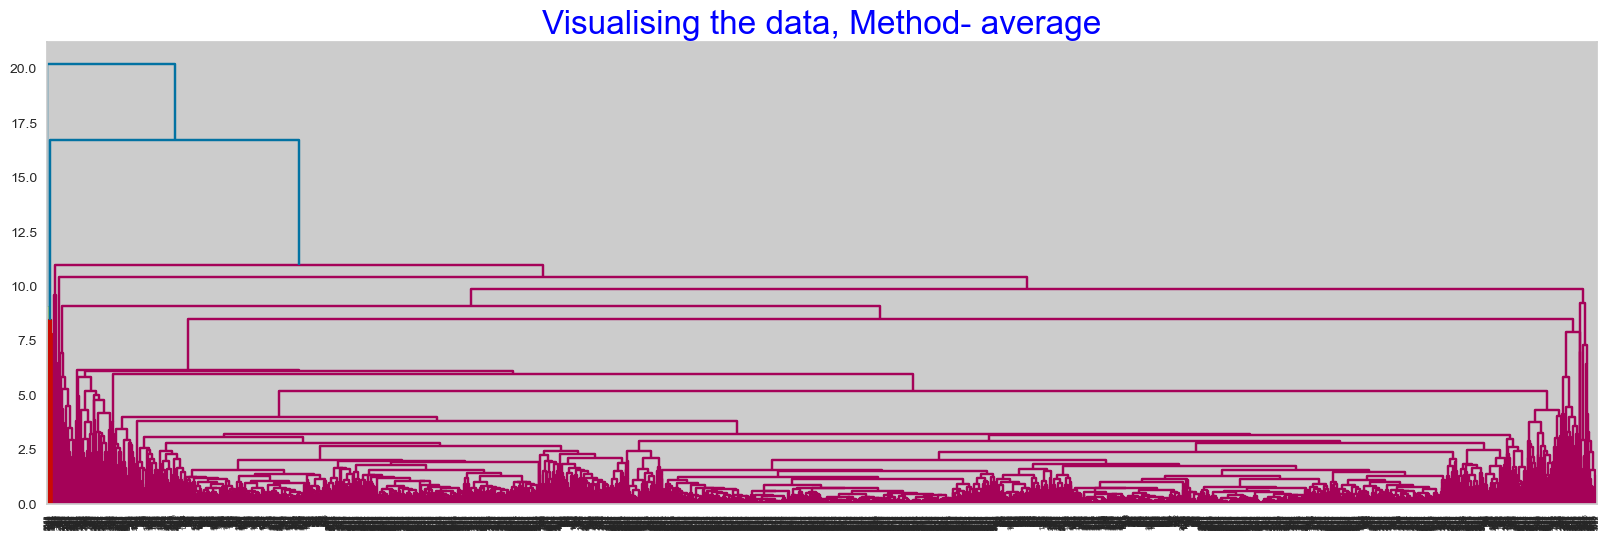

In [82]:
import scipy.cluster.hierarchy as shc
for methods in ['average']: 
    plt.figure(figsize =(20, 6)) 
    dict = {'fontsize':24,'fontweight' :16, 'color' : 'blue'}
    plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict) 
    Dendrogram2 = shc.dendrogram(shc.linkage(pca_std_df, method = methods,optimal_ordering=False))

In [83]:
hie_cluster = pd.DataFrame(agg_clustering.labels_.copy(), columns=['Hie_Clustering'])
hie_cluster

,Hie_Clustering
0,0
1,0
2,0
3,0
4,0
...,...
3994,0
3995,0
3996,0
3997,0


In [84]:
hie_df = pd.concat([air.copy(), hie_cluster], axis=1)
hie_df .head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Hie_Clustering
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0


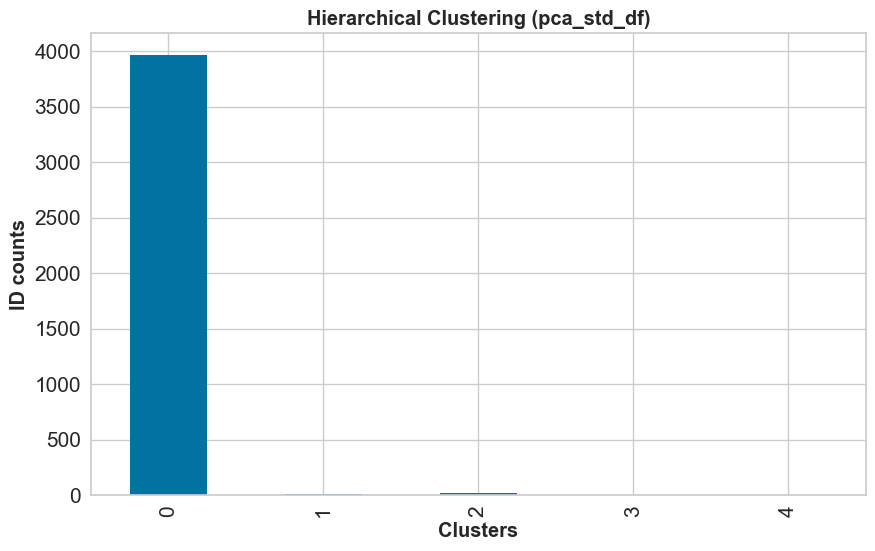

In [85]:
fig, ax = plt.subplots(figsize=(10, 6))
hie_df.groupby(['Hie_Clustering']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Hierarchical Clustering (pca_std_df)',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [86]:
#Conclusion
#Between KMeans and Hierarchical

In [87]:
Kmeans_df.groupby(['Kmeans_Clustering']).count()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
Kmeans_Clustering,,,,,,,,,,,,
0,59,59,59,59,59,59,59,59,59,59,59,59
1,2440,2440,2440,2440,2440,2440,2440,2440,2440,2440,2440,2440
2,15,15,15,15,15,15,15,15,15,15,15,15
3,1301,1301,1301,1301,1301,1301,1301,1301,1301,1301,1301,1301
4,141,141,141,141,141,141,141,141,141,141,141,141
5,43,43,43,43,43,43,43,43,43,43,43,43


In [88]:
hie_df.groupby(['Hie_Clustering']).count()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
Hie_Clustering,,,,,,,,,,,,
0,3965,3965,3965,3965,3965,3965,3965,3965,3965,3965,3965,3965
1,10,10,10,10,10,10,10,10,10,10,10,10
2,15,15,15,15,15,15,15,15,15,15,15,15
3,4,4,4,4,4,4,4,4,4,4,4,4
4,5,5,5,5,5,5,5,5,5,5,5,5


In [89]:
count_df = Kmeans_df.groupby(['Kmeans_Clustering']).count()
count_df

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
Kmeans_Clustering,,,,,,,,,,,,
0,59,59,59,59,59,59,59,59,59,59,59,59
1,2440,2440,2440,2440,2440,2440,2440,2440,2440,2440,2440,2440
2,15,15,15,15,15,15,15,15,15,15,15,15
3,1301,1301,1301,1301,1301,1301,1301,1301,1301,1301,1301,1301
4,141,141,141,141,141,141,141,141,141,141,141,141
5,43,43,43,43,43,43,43,43,43,43,43,43


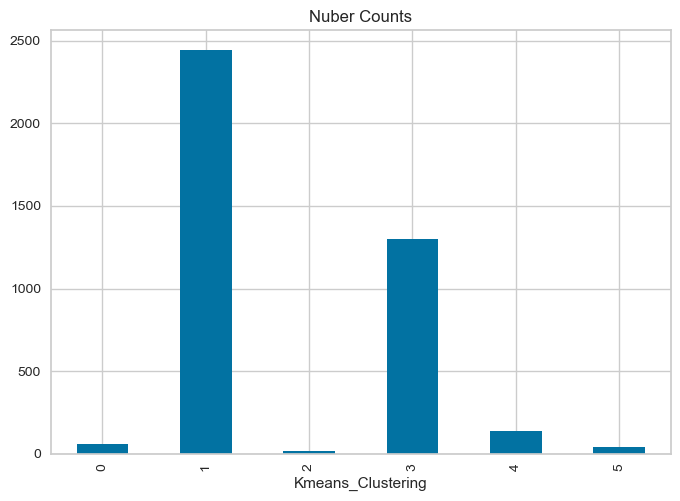

In [90]:
count = count_df.xs('ID' ,axis = 1)
count.plot(kind='bar', title= 'Nuber Counts')
plt.show()

In [91]:
cluster1 = pd.DataFrame(Kmeans_df.loc[Kmeans_df.Kmeans_Clustering==0].mean(),columns= ['Cluster1_avg'])
cluster2 = pd.DataFrame(Kmeans_df.loc[Kmeans_df.Kmeans_Clustering==1].mean(),columns= ['Cluster2_avg'])
cluster3 = pd.DataFrame(Kmeans_df.loc[Kmeans_df.Kmeans_Clustering==2].mean(),columns= ['Cluster3_avg'])
cluster4 = pd.DataFrame(Kmeans_df.loc[Kmeans_df.Kmeans_Clustering==3].mean(),columns= ['Cluster4_avg'])
cluster5 = pd.DataFrame(Kmeans_df.loc[Kmeans_df.Kmeans_Clustering==4].mean(),columns= ['Cluster5_avg'])

In [92]:
avg_df = pd.concat([cluster1,cluster2,cluster3,cluster4,cluster5],axis=1)
avg_df

,Cluster1_avg,Cluster2_avg,Cluster3_avg,Cluster4_avg,Cluster5_avg
ID,2110.423729,2234.516803,1664.866667,1623.552652,1742.758865
Balance,117326.186441,42329.807377,138061.400000,117304.675634,187792.460993
Qual_miles,5445.305085,49.405738,78.800000,50.634128,471.163121
cc1_miles,2.033898,1.186475,3.466667,3.690238,2.262411
cc2_miles,1.000000,1.000000,1.000000,1.000000,1.000000
cc3_miles,1.000000,1.000410,4.066667,1.001537,1.000000
Bonus_miles,19059.610169,4263.749180,93927.866667,38668.126826,33236.602837
Bonus_trans,12.305085,6.575000,28.066667,18.837048,27.978723
Flight_miles_12mo,965.796610,208.886885,506.666667,327.721752,5773.602837
Flight_trans_12,2.881356,0.638525,1.600000,0.989239,16.730496


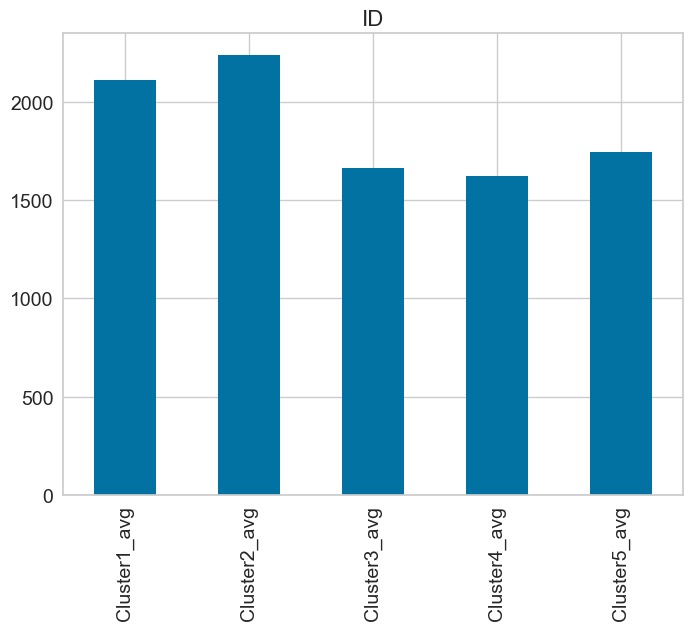

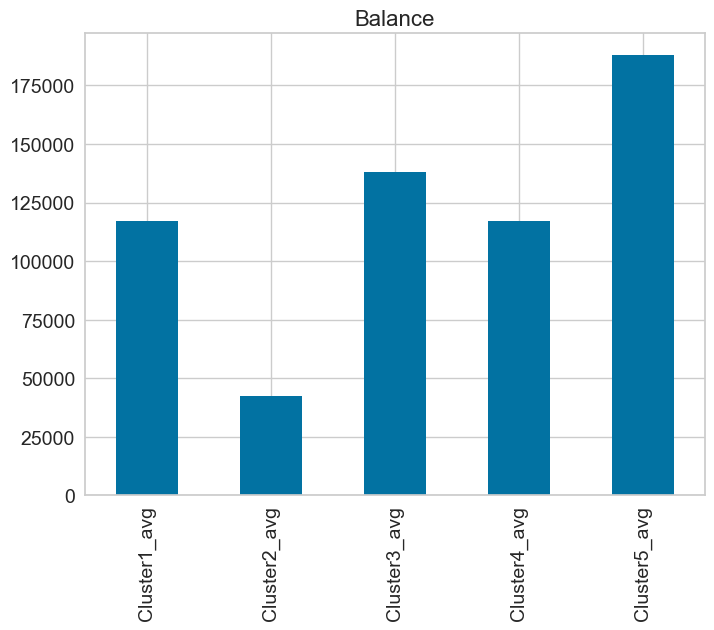

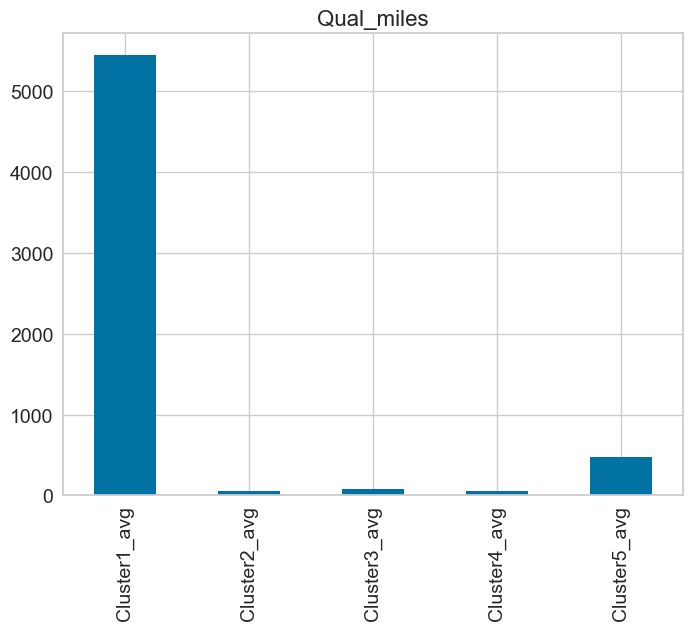

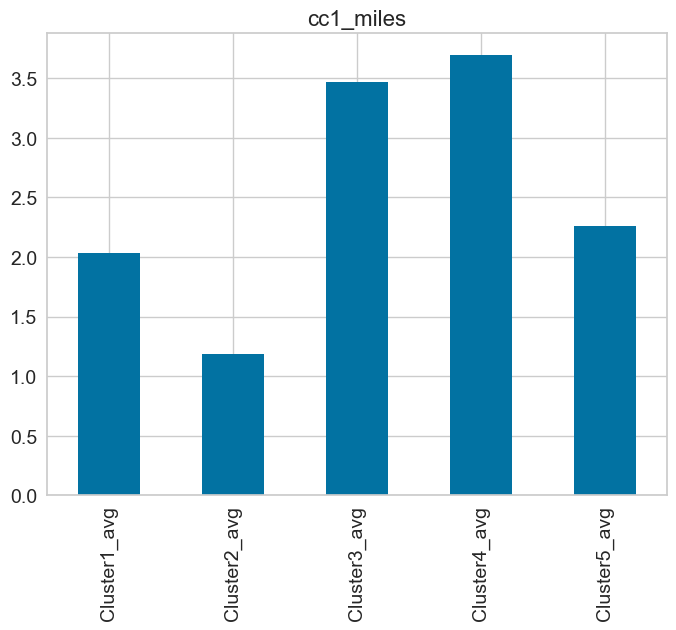

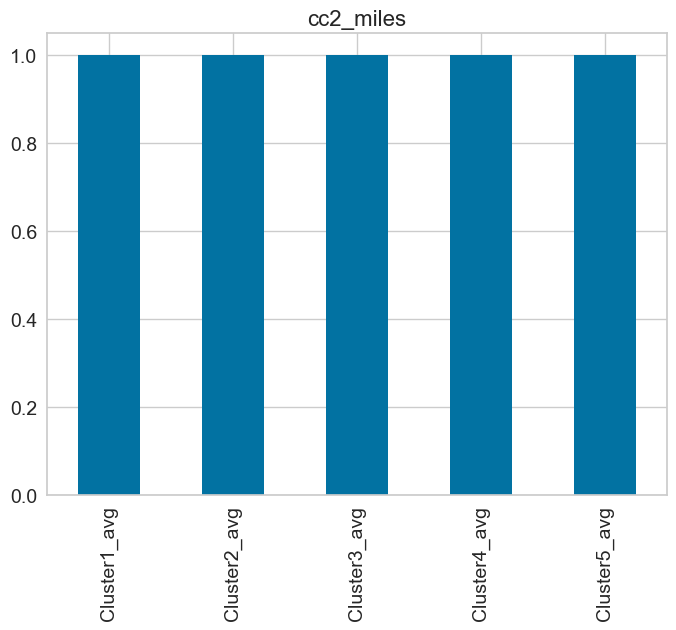

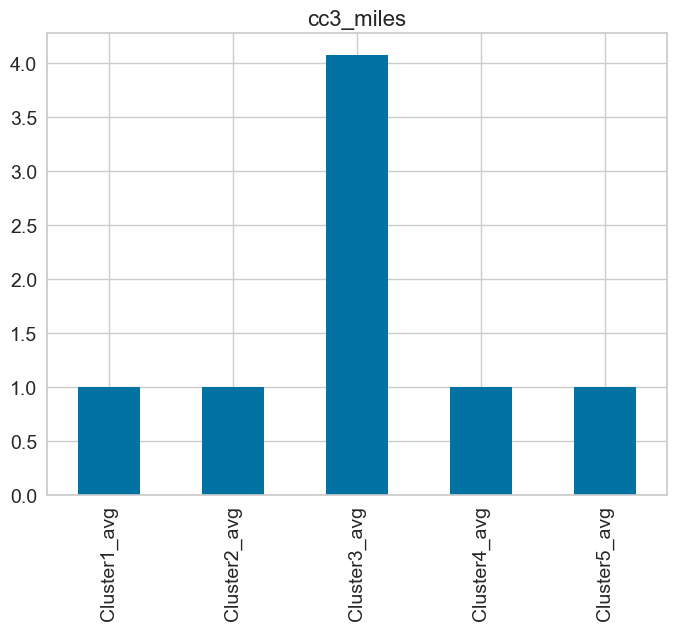

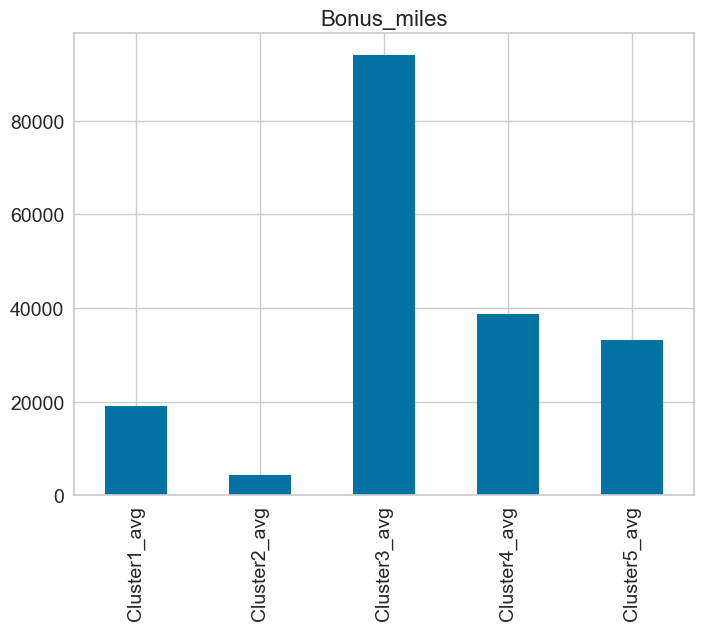

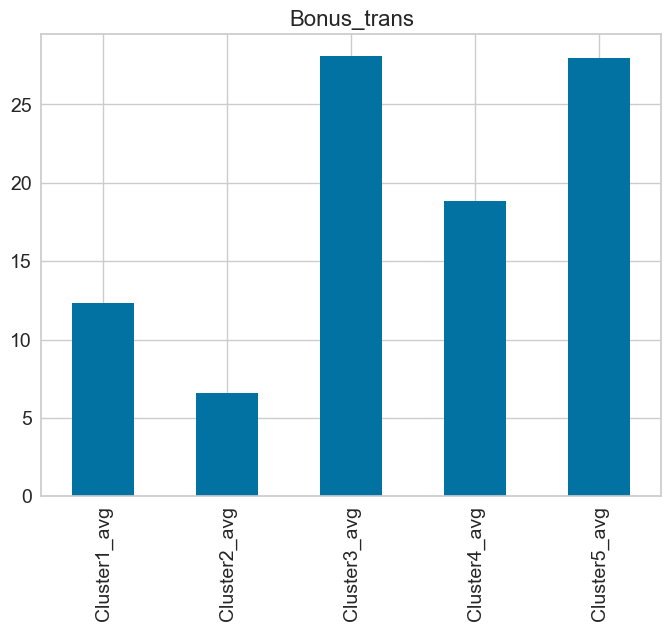

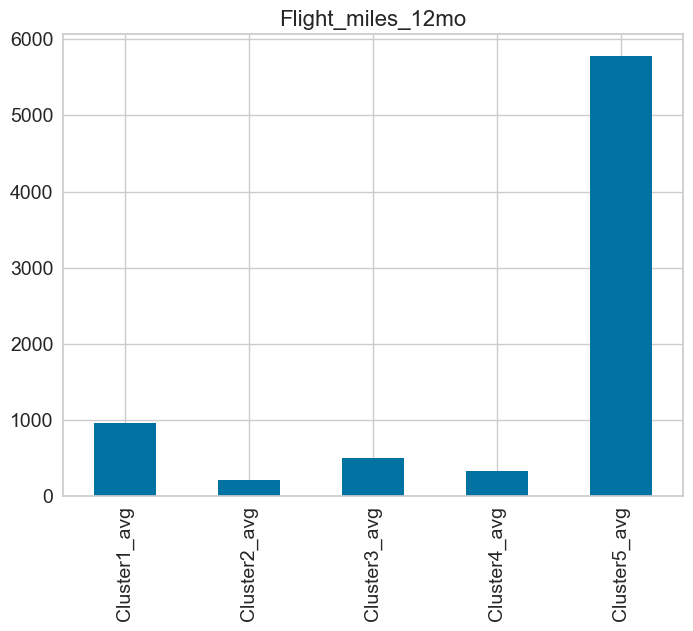

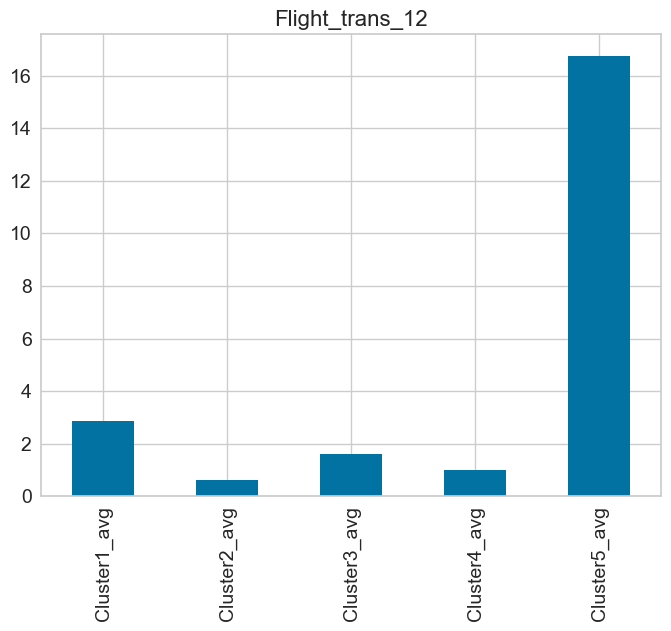

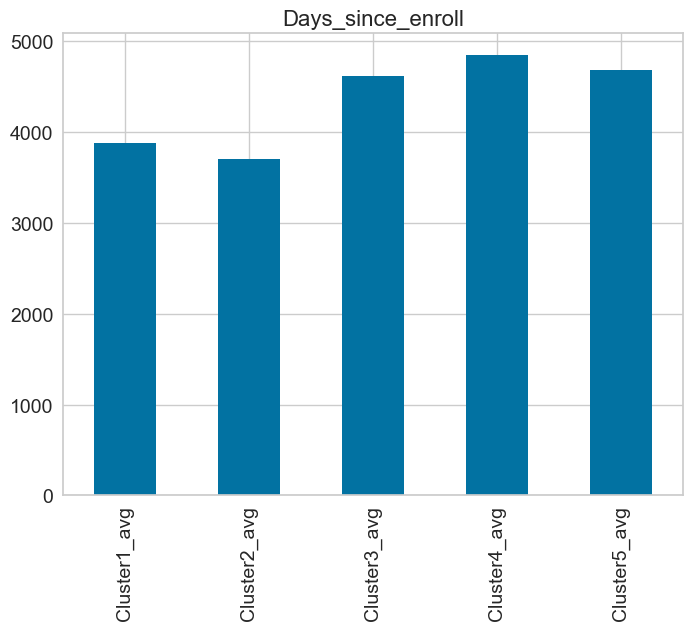

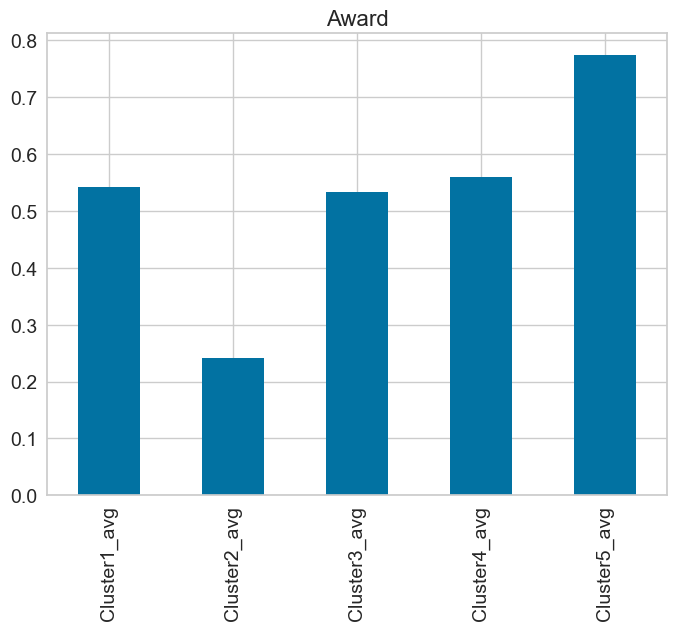

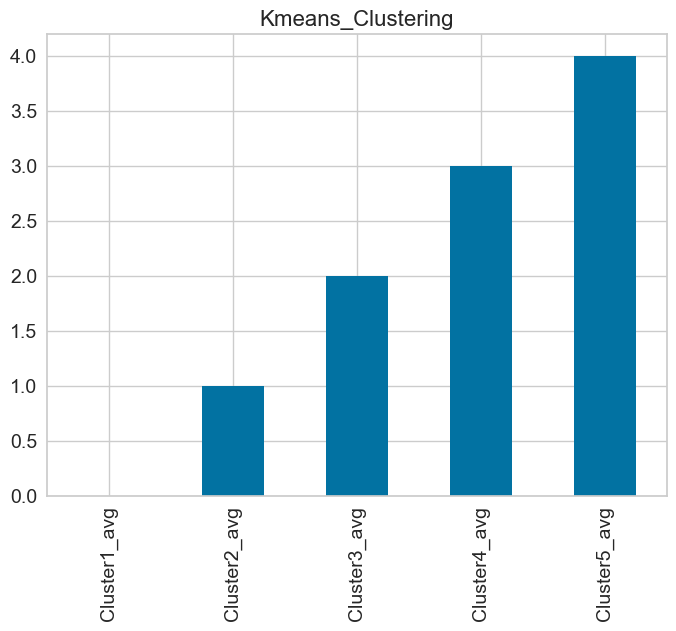

In [93]:
for i , row in avg_df.iterrows():
    fig = plt.subplots(figsize=(8,6))
    j = avg_df.xs(i ,axis = 0)
    plt.title(i, fontsize=16, fontweight=20)
    j.plot(kind='bar',fontsize=14)
    plt.show()
    print()

In [94]:
# Done